<a href="https://colab.research.google.com/github/MatiasJJ/ATML/blob/edits/Ex2/Ex2_Matias_Jakub_Madeleine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex2

*by: Madeleine Ekblom, Matias Jääskeläinen, Jakub Kubečka*

Time used: 10h

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Problem 1

tested 3300  
test positive 50/3300  
population 1 900 000  
confirmed 956/1900000  
deaths 100

Test 1: 371 negative  
TN = 369/371  
FP = 2/371
spesificity 0.9946

Test 2: 197 positive  
TP = 178  
FN = 19
sensitivity = 0.9035




Bernoulli distribution  
$p(x |\theta) = \theta^{x} (1-\theta)^{1-x}$

so:  
$p(x = 1| \theta) = \theta$
 
$p(x = 0| \theta) = 1-\theta$

and a prior Beta distribution  
$p(\theta) \propto \theta^{\alpha-1} (1-\theta)^{\beta -1}$

TEST: Drawn $n$ binary numbers $x$ with $(k) \times 1$ and $(n-k) \times 0$ 

1. Write down the formulas for likelihood and posterior, given $n$ $k$, $α$, and $β$ You can ignore multiplicative factors that are constant in (why?).

likelihood:  \\
  $p(x|\theta) = \theta^{x} (1-\theta)^{1-x}$ 

posterior: \\
  $p(\theta|x) \propto p(\theta)*p(x|\theta) = (\theta^{\alpha-1} (1-\theta)^{\beta -1})*(\theta^{x} (1-\theta)^{1-x})$  \\
  $p(\theta|x) \propto \theta^{\alpha+x-1} (1-\theta)^{\beta -x}$

We do not care about constants: 1) They can be obtained by normalization, and 2) we do not need them for calculating ML or MAP since they do not shift the maximum position.

2. Derive the ML and MAP estimates $\hat{\theta}_{ML}$ and $\hat{\theta}_{MAP}$ for $\theta$. How can you interpret $\alpha$ and $\beta$ that appear in the formula for $\hat{\theta}_{MAP}$?

MAXIMUM LIKELIHOOD: \\
$\hat\theta_\mathrm{ML} = \arg \max_\theta p(x|\theta) = \arg \max_\theta \theta^{x} (1-\theta)^{1-x} = E[x] = k/n$ \\
To do so, we needed to derivate logarithm of the max argument: \\
$\frac{d}{d\theta} \log (\theta^{x} (1-\theta)^{1-x}) = 0 $ \\
$\frac{d}{d\theta} (x\log \theta + (1-x)\log(1-\theta)) = 0 $ \\
$x/\theta - (1-x)/(1-\theta) = 0 $ \\
$\theta  = x $ \\

> $\binom{n}{k} \theta^{k} (1- \theta)^{n-k} $ binomial distribution  

MAXIMUM A POSTERIORI: \\
$\hat\theta_\mathrm{MAP} = \arg \max_\theta p(\theta|x) = \arg \max_\theta \theta^{\alpha+x-1} (1-\theta)^{\beta -x} = E[\frac{\alpha+x-1}{\alpha+\beta-1}] = \frac{\alpha+E[x]-1}{\alpha+\beta-1} = \frac{\alpha+k/n-1}{\alpha+\beta-1}$ \\
To do so, we needed to derivate logarithm of the max argument: \\
$\frac{d}{d\theta} \log (\theta^{\alpha+x-1} (1-\theta)^{\beta -x}) = 0 $ \\
$\frac{d}{d\theta} ((\alpha+x-1)\log \theta + (\beta -x)\log(1-\theta)) = 0 $ \\
$(\alpha+x-1)/\theta - (\beta -x)/(1-\theta) = 0 $ \\
$\theta  = \frac{\alpha+x-1}{\alpha+\beta-1} $ \\

$\alpha$ increases the probablity of the event, and on the other side, $\beta$ decreases the probability

3. Are the estimates θˆML and θˆMAP unbiased and/or consistent?


Yes, θˆML and θˆMAP are biased because both of them depend on $E[x]$. 

4. Plug in suitable n and k and compute ML and MAP estimates for the specificity and sensitivity for the serological test described above.

$x = 0 $ (test is incorrect),
$x = 1 $ (test is correct) \\
$y = 0 $ (negative person),
$y = 1 $ (positive person) \\


Test 1: 371 negative \\
TN = 369  
FP = 2 \\
$sp$ = specificity = 0.9946

Test 2: 197 positive  
TP = 178  
FN = 19 \\
$se$ = sensitivity = 0.9035

$n*p(x=0|y=0) = 369$ \\
$n*p(x=1|y=0) = 2$

$\hat{sp}_\mathrm{ML} = \arg \max_{sp} p(x=1|y=0) = 369/n = 369/371 = 0.9946$ \\
$\hat{sp}_\mathrm{MAP} = \arg \max_{sp} p(y=0|x=1) = p(y=0)/p(x=1)*p(𝑥=1|𝑦=0) = $  

5. Then compute bootstap 95CI for the specificity and sensitivity.


6. Let’s consider null hypothesis that the prevalence is zero, i.e. all 50 of the observed positives are actually false positives. There are many ways to construct a statistical test to try to reject this null hypothesis. One approach is to use Fisher’s Exact test. Compute the p-value given by the Fisher’s exact test. Can you rule out the null hypothesis?

## Problem 2

The probability that a given observation is part of a bootstrap sample. 
Suppose that we obtain a bootstrap sample from a set of n observations.

(a) What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.

(b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?

(c) Argue that the probability that the jth observation is not in the bootstrap sample is $(1 − 1/n)^n$

obs!  
$\lim_{n \rightarrow \infty} (1 − 1/n)^n = 1/e \approx 0.368$ 

The sample space contains n observations x_1 ... x_n



Probability of picking i-th observation \\
$P(i-\mathrm{th\_observation}) = 1/n $ 

Probability of not picking i-th observation \\
$P(i-\mathrm{th\_observation}) = 1-1/n $ 

Probability of not picking i-th observation with n picks \\
$P(i-\mathrm{th\_observation})^n = (1-1/n)^n $ 

Probability of picking i-th observation with n picks (at least once) \\
$1-P(i-\mathrm{th\_observation})^n = 1-(1-1/n)^n $

We can test what is the limit: \\
$\lim_{n->\inf} 1-P(i-\mathrm{th\_observation})^n = \lim_{n->\inf} 1-(1-1/n)^n \approx 1 - 0.368 = 0.632 $

In [0]:
def p_i(n):
  return 1-(1-1/n)**n

In [0]:
p_values = []
for i in range(1,101):
  p_values.append(p_i(i))

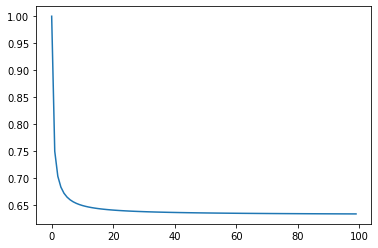

In [0]:
plt.plot(p_values)

In [0]:
p_values[-1]

0.6339676587267709

## Problem 3

> filepath: "/content/drive/My Drive/Colab Notebooks/CO2_exchange.csv"

estimate CO2 fluxes given some covariates  
the regressor could fill the gaps in the measurement

`FCO2`gives the flux and others can be used as covariates

In [0]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

In [0]:
np.random.seed(42)
def listdiff(a,b): 
    s = set(b)
    return(np.array([x for x in a if x not in s]))
co2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CO2_exchange.csv",index_col=0)
co2.columns = list(map(lambda x: x.replace("HYY_META.",""),co2.columns)) # get rid of H

In [0]:
n = 100
itr = np.random.choice(co2.shape[0],n) # training set index 
ite = listdiff(range(co2.shape[0]),itr) # test set index

X_tr = np.array(co2.iloc[itr].drop("FCO2",axis=1)) # training set 
y_tr = co2["FCO2"][itr] # training set 

X_te = np.array(co2.iloc[ite].drop("FCO2",axis=1)) # test set
y_te = co2["FCO2"][ite] # test set

Train all of the regressors on the training set and report the mean squared errors (MSE) on both the training and test sets.  
Which of the models performs best on the training set and on the test set?  
What does this tell about complexity of the respective model families?

In [0]:
fit = LinearRegression().fit(X_tr,y_tr) 
print("LinearRegression: MSE_tr = %g MSE_te = %g" %
              (np.mean((fit.predict(X_tr)-y_tr)**2),
               np.mean((fit.predict(X_te)-y_te)**2)))

LinearRegression: MSE_tr = 3.04531 MSE_te = 6.36047


In [0]:
fit = DecisionTreeRegressor().fit(X_tr,y_tr) 
print("DecisionTreeRegressor: MSE_tr = %g MSE_te = %g" %
              (np.mean((fit.predict(X_tr)-y_tr)**2),
               np.mean((fit.predict(X_te)-y_te)**2)))

DecisionTreeRegressor: MSE_tr = 1.04653e-09 MSE_te = 7.05277


In [0]:
fit = RandomForestRegressor().fit(X_tr,y_tr) 
print("RandomForestRegressor: MSE_tr = %g MSE_te = %g" %
              (np.mean((fit.predict(X_tr)-y_tr)**2),
               np.mean((fit.predict(X_te)-y_te)**2)))

RandomForestRegressor: MSE_tr = 0.589779 MSE_te = 4.24266


In [0]:
fit = SVR().fit(X_tr,y_tr) 
print("SVR: MSE_tr = %g MSE_te = %g" %
              (np.mean((fit.predict(X_tr)-y_tr)**2),
               np.mean((fit.predict(X_te)-y_te)**2)))

SVR: MSE_tr = 6.03422 MSE_te = 6.46343


In [0]:
fit = Ridge().fit(X_tr,y_tr) 
print("Ridge: MSE_tr = %g MSE_te = %g" %
              (np.mean((fit.predict(X_tr)-y_tr)**2),
               np.mean((fit.predict(X_te)-y_te)**2)))

Ridge: MSE_tr = 3.41181 MSE_te = 6.8919


>Smallest training error: DecisionTree  
>Smallest test error : RandomForest

>Decision tree is very complex for it has smallest training error but quite a large test error

Next, split the 100 items in the training set in random to new training set of 50 items and to a validation set of 50 items. Train all of the regressors on the new training set and report MSE on the new training set, validation set, and the test set.

In [0]:
n_val = 50
idval = itr[:50] # validation set index
itr = itr[50:] # validation set index

In [0]:
idval.shape, itr.shape

((50,), (50,))

In [0]:
X_tr = np.array(co2.iloc[itr].drop("FCO2",axis=1)) # training set 
y_tr = co2["FCO2"][itr] # training set 

X_val = np.array(co2.iloc[idval].drop("FCO2",axis=1)) # training set 
y_val = co2["FCO2"][idval] # training set 

In [0]:
fit = LinearRegression().fit(X_tr,y_tr) 
print("LinearRegression: MSE_tr = %g MSE_val = %g MSE_te = %g" %
              (np.mean((fit.predict(X_tr)-y_tr)**2),
               np.mean((fit.predict(X_val)-y_val)**2),
               np.mean((fit.predict(X_te)-y_te)**2)))

LinearRegression: MSE_tr = 2.52478 MSE_val = 11.5017 MSE_te = 12.7752


In [0]:
fit = DecisionTreeRegressor().fit(X_tr,y_tr) 
print("DecisionTreeRegressor: MSE_tr = %g MSE_val = %g MSE_te = %g" %
              (np.mean((fit.predict(X_tr)-y_tr)**2),
               np.mean((fit.predict(X_val)-y_val)**2),
               np.mean((fit.predict(X_te)-y_te)**2)))

DecisionTreeRegressor: MSE_tr = 0 MSE_val = 10.2511 MSE_te = 10.0583


In [0]:
fit = RandomForestRegressor().fit(X_tr,y_tr) 
print("RandomForestRegressor: MSE_tr = %g MSE_val = %g MSE_te = %g" %
              (np.mean((fit.predict(X_tr)-y_tr)**2),
               np.mean((fit.predict(X_val)-y_val)**2),
               np.mean((fit.predict(X_te)-y_te)**2)))

RandomForestRegressor: MSE_tr = 0.790095 MSE_val = 6.43521 MSE_te = 6.0512


In [0]:
fit = SVR().fit(X_tr,y_tr) 
print("SVR: MSE_tr = %g MSE_val = %g MSE_te = %g" %
              (np.mean((fit.predict(X_tr)-y_tr)**2),
               np.mean((fit.predict(X_val)-y_val)**2),
               np.mean((fit.predict(X_te)-y_te)**2)))

SVR: MSE_tr = 6.72429 MSE_val = 8.79886 MSE_te = 7.99797


In [0]:
fit = Ridge().fit(X_tr,y_tr) 
print("Ridge: MSE_tr = %g MSE_val = %g MSE_te = %g" %
              (np.mean((fit.predict(X_tr)-y_tr)**2),
               np.mean((fit.predict(X_val)-y_val)**2),
               np.mean((fit.predict(X_te)-y_te)**2)))

Ridge: MSE_tr = 3.41181 MSE_val = 6.00706 MSE_te = 6.8919


Which of the five regressors is the best? 
> The best would be RandomForest but Ridge seems best based on validation

How does MSE on the training data compare to the error on the test set?
> It is smaller

How does the error on the validation set compare to the error on the test set?
> They are roughly the same

Could you do something with these regressor (on this training set) to make them perform better?
> Get bigger training set  
> Loop over different sets of splitting of the training set into new training and validation sets \\
> Cross validation splitting